In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk textblob


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Simulated feedback dataset
data = {
    'user_id': [101, 102, 103, 104, 105],
    'interaction_timestamp': ['2025-01-01 08:45', '2025-01-01 09:00', '2025-01-01 10:15', '2025-01-01 11:30', '2025-01-01 12:00'],
    'user_feedback_text': [
        "The robot did a great job cleaning the living room.",
        "It missed several spots under the couch.",
        "I love how it delivers water with a smile.",
        "It got stuck near the stairs again.",
        "Worked flawlessly, thank you!"
    ],
    'robot_task_type': ['cleaning', 'cleaning', 'delivery', 'cleaning', 'delivery'],
    'task_success': [True, False, True, False, True]
}

df = pd.DataFrame(data)
df.to_csv('robot_feedback.csv', index=False)


   user_id interaction_timestamp  \
0      101      2025-01-01 08:45   
1      102      2025-01-01 09:00   
2      103      2025-01-01 10:15   
3      104      2025-01-01 11:30   
4      105      2025-01-01 12:00   

                                  user_feedback_text robot_task_type  \
0  The robot did a great job cleaning the living ...        cleaning   
1           It missed several spots under the couch.        cleaning   
2         I love how it delivers water with a smile.        delivery   
3                It got stuck near the stairs again.        cleaning   
4                      Worked flawlessly, thank you!        delivery   

   task_success  
0          True  
1         False  
2          True  
3         False  
4          True  


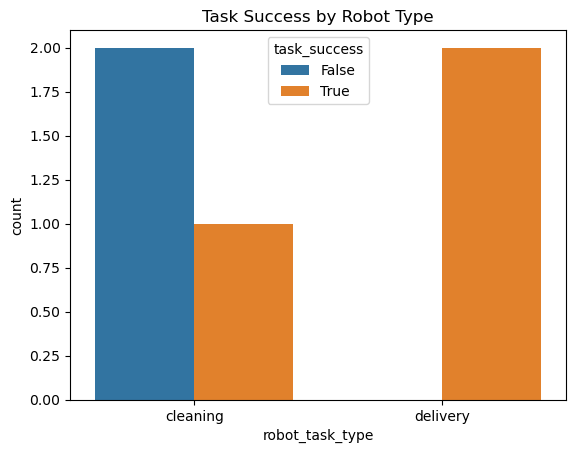

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('robot_feedback.csv')
print(df.head())

# Task type vs success
sns.countplot(x='robot_task_type', hue='task_success', data=df)
plt.title('Task Success by Robot Type')
plt.show()


In [7]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['user_feedback_text'].apply(get_sentiment)
print(df[['user_feedback_text', 'sentiment']])


                                  user_feedback_text sentiment
0  The robot did a great job cleaning the living ...  Positive
1           It missed several spots under the couch.   Neutral
2         I love how it delivers water with a smile.  Positive
3                It got stuck near the stairs again.  Positive
4                      Worked flawlessly, thank you!  Positive


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['user_feedback_text'])

feature_names = vectorizer.get_feature_names_out()
dense = X.todense()
denselist = dense.tolist()

# Display TF-IDF scores for first feedback
print("\nTF-IDF for 1st Feedback:")
print(dict(zip(feature_names, denselist[0])))



TF-IDF for 1st Feedback:
{'cleaning': 0.3779644730092272, 'couch': 0.0, 'delivers': 0.0, 'did': 0.3779644730092272, 'flawlessly': 0.0, 'got': 0.0, 'great': 0.3779644730092272, 'job': 0.3779644730092272, 'living': 0.3779644730092272, 'love': 0.0, 'missed': 0.0, 'near': 0.0, 'robot': 0.3779644730092272, 'room': 0.3779644730092272, 'smile': 0.0, 'spots': 0.0, 'stairs': 0.0, 'stuck': 0.0, 'thank': 0.0, 'water': 0.0, 'worked': 0.0}


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X = vectorizer.fit_transform(df['user_feedback_text'])
y = df['task_success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00       1.0
        True       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\m